In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00


In [ ]:
!wget -P -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt

In [3]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.0 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key = "API_KEY")
project = rf.workspace("brain-mri").project("mri-rskcu")
version = project.version(3)
dataset = version.download("yolov10")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MRI-3 in yolov8:: 100%|██████████| 2015/2015 [00:00<00:00, 7407.14it/s]


In [ ]:
# Train Model YOLOv10 untuk Object Detection menggunakan Dataset di atas, dengan 200 Epochs dan Batch Size 32.

!yolo task=detect mode=train epochs=200 batch=32 plots=True \
model = "/content/-q/yolov10n.pt" \
data = "/content/MRI-3/data.yaml"

In [ ]:
# Load Model yang telah di-train
from ultralytics import YOLOv10

model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLOv10(model_path)

# Use Model untuk Object Detection pada Validation Image Dataset, Save dengan Confidence Threshold 0.25.
result = model(source = "/content/MRI-3/valid/images", conf=0.25, save=True)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



image 1/151 /content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg: 640x640 1 Brain-Tumor, 14.2ms
image 2/151 /content/MRI-3/valid/images/Tr-gl_0021_jpg.rf.82e37d9cdf73ab894e8af3cd4bfb70a8.jpg: 640x640 1 Brain-Tumor, 11.8ms
image 3/151 /content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg: 640x640 1 Brain-Tumor, 12.1ms
image 4/151 /content/MRI-3/valid/images/Tr-gl_0228_jpg.rf.b9ecef834d39f770e41b0585b63bdc1a.jpg: 640x640 (no detections), 11.4ms
image 5/151 /content/MRI-3/valid/images/Tr-gl_0342_jpg.rf.10e62693351dae5f8b8f0e136c8ec8c3.jpg: 640x640 1 Brain-Tumor, 2 eyes, 11.3ms
image 6/151 /content/MRI-3/valid/images/Tr-gl_0493_jpg.rf.4393a755ad877b333ee635f7d8625687.jpg: 640x640 1 Brain-Tumor, 11.9ms
image 7/151 /content/MRI-3/valid/images/Tr-gl_0565_jpg.rf.4975825d65539d7d35caf0f61517f236.jpg: 640x640 1 Brain-Tumor, 11.3ms
image 8/151 /content/MRI-3/valid/images/Tr-gl_0585_jpg.rf.eeb0b7c0f19a6763494b9e53fee546db.jpg: 640x640 1

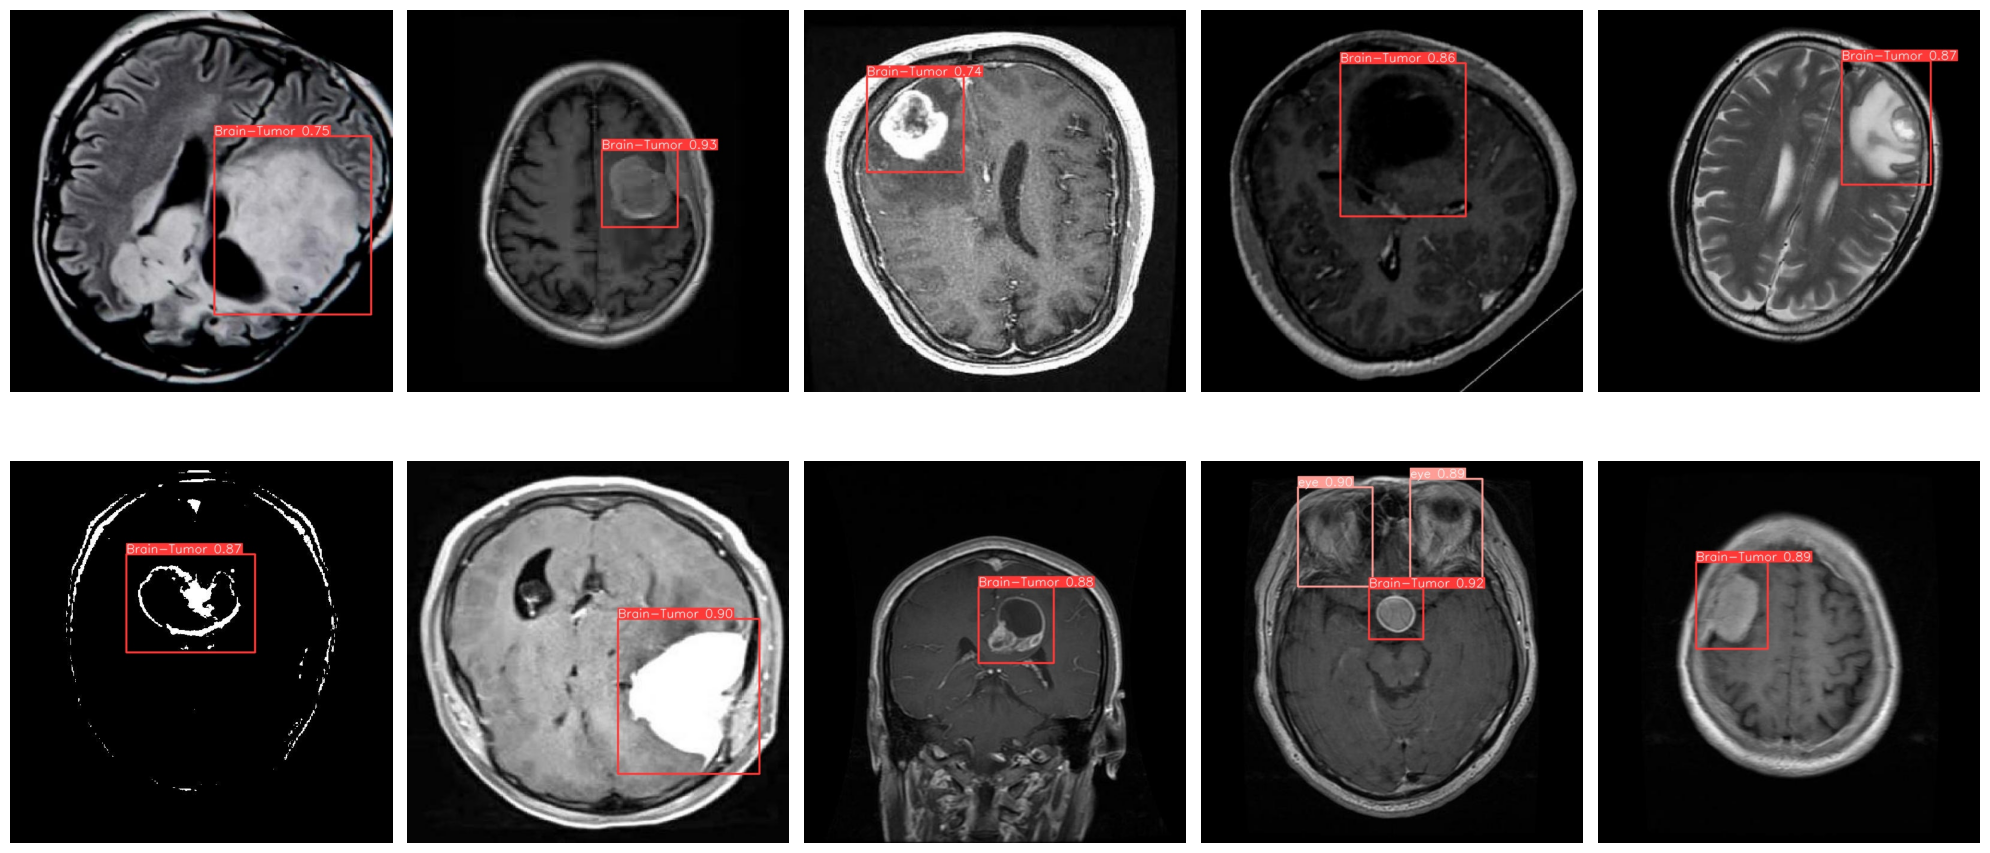

In [ ]:
# Load and Show 10 Gambar Hasil Prediksi
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/detect/predict/*.jpg")

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i < len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()

100%|██████████| 41.5k/41.5k [00:00<00:00, 269kB/s]


image 1/1 /content/3-Figure4-1.png: 576x640 1 Brain-Tumor, 48.9ms
Speed: 2.9ms preprocess, 48.9ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [ 45,  45,  45],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [ 44,  44,  44],
        [ 45,  45,  45],
        [ 45,  45,  45]],

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [ 44,  44,  44],
        [ 45,  45,  45],
        [ 45,  45,  45]]], dtype=uint8)
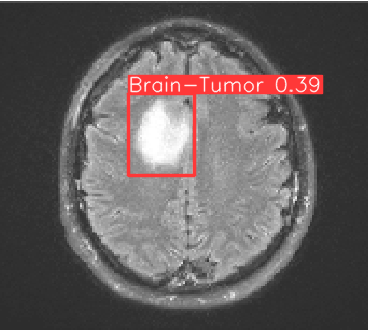

In [ ]:
# Load Model untuk memprediksi gambar input
result = model.predict(source = "https://d3i71xaburhd42.cloudfront.net/148c10859674a5d13af4e2983a0996274c93a25a/3-Figure4-1.png", imgsz = 640, conf = 0.25)
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]

In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import cv2
import numpy as np

def predict(image):
  result = model.predict(source=image, imgsz = 640, conf = 0.25)
  annotated_img = result[0].plot()
  annotated_img = annotated_img[:, :, ::-1]
  return annotated_img

app = gr.Interface(
    fn =predict,
    inputs = gr.Image(type="numpy", label="Upload an image"),
    outputs = gr.Image(type="numpy", label="Detect Brain Tumor"),
    title = "Brain Tumor Detection Using Yolov10",
    description="Upload an image and the yolov10 model will detect and annotated brain tumor"
)

app.launch()